In [27]:
import pandas as pd

data_path = "/data/ephemeral/home/level1-imageclassification-cv-05/Data/real_data"

train = pd.read_csv(data_path + "/train.csv")

train.head()

id  gender   race  age                    path
0  000001  female  Asian   45  000001_female_Asian_45
1  000002  female  Asian   52  000002_female_Asian_52
2  000004    male  Asian   54    000004_male_Asian_54
3  000005  female  Asian   58  000005_female_Asian_58
4  000006  female  Asian   59  000006_female_Asian_59

In [29]:
# 타깃 별로 추출
class_0 = train.loc[train['gender']=='male']
class_1 = train.loc[train['gender']=='female']


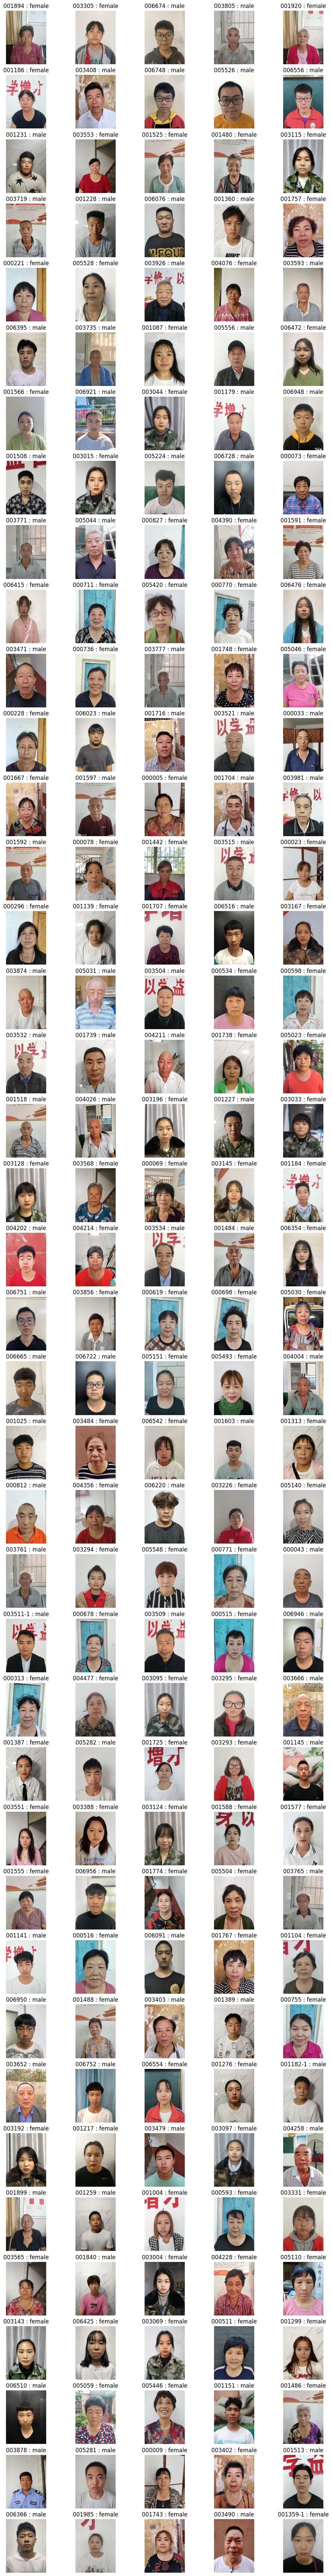

In [55]:
import os
import glob
import cv2
import matplotlib.pyplot as plt

# images 폴더 경로
images_folder = "/data/ephemeral/home/level1-imageclassification-cv-05/Data/real_data/images"

# images 폴더 안의 모든 하위 폴더에서 normal.jpg 파일 찾기
file_paths = glob.glob(os.path.join(images_folder, "*", "normal.jpg"))

# 찾은 파일들 중에서 50개만 불러오기
file_paths = file_paths[:200]

# 이미지를 출력할 Matplotlib subplot 설정
num_rows = 40  # 원하는 행의 수
num_cols = 5  # 원하는 열의 수
fig, axes = plt.subplots(num_rows, num_cols, figsize=(13, 100))

# 각 파일을 불러와서 subplot에 배치
for i, file_path in enumerate(file_paths):
    image = cv2.imread(file_path)
    
    # 현재 이미지를 현재 subplot에 배치
    axes[i // num_cols, i % num_cols].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[i // num_cols, i % num_cols].axis('off')

    # 각 subplot에 title로 gender 정보 추가
    ID = file_path.split(os.sep)[-2].split("_")[0]
    gender = file_path.split(os.sep)[-2].split("_")[1]
    axes[i // num_cols, i % num_cols].set_title(f"{ID} : {gender}")

plt.show()
